In [12]:
import cv2
import numpy
import matplotlib.pyplot as plt
from skimage import io
import os

In [9]:
img=io.imread(r"F:\MLIoT\ML\dataset\emotion_detection\images\subject02_happy.png")

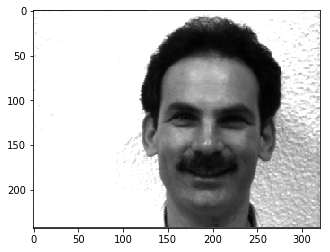

In [10]:
plt.imshow(img,cmap='gray')
plt.show()

In [19]:
path=r"F:\MLIoT\ML\dataset\emotion_detection\images"

In [36]:
def load_data(path):
    xd=[]
    yd=[]
    files=os.listdir(path)
    fd=cv2.CascadeClassifier(r"C:\Python35\images\haarcascade_frontalface_alt.xml")
    for file in files:
        img=io.imread(path+'\\'+file)
        faces=fd.detectMultiScale(img,1.3,5)
        if len(faces)!=0:
            for (x,y,w,h) in faces:
                face=img[y:y+h,x:x+w]
                face=cv2.resize(face,(140,140))
                cv2.imshow('img',face)
                cv2.waitKey(5000)
                cv2.destroyAllWindows()
                face=face.reshape(1,-1)
                xd.append(face)
                if 'happy' in file:
                    yd.append('happy')
                elif 'surprised' in file:
                    yd.append('surprised')
    xd=numpy.concatenate(xd)
    return xd,yd

In [38]:
xd,yd=load_data(path)
print(xd.shape)
print(len(yd))
for i in xd:
    print(i.shape)

(28, 19600)
28
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)
(19600,)


In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model=KNeighborsClassifier(n_neighbors=3)

In [41]:
model.fit(xd,yd)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [70]:
def prediction(img,model=model):
    img2=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    fd=cv2.CascadeClassifier(r"C:\Python35\images\haarcascade_frontalface_alt.xml")
    faces=fd.detectMultiScale(img,1.3,5)
    if (len(faces)!=0):
        for (x,y,w,h) in faces:
            face=img2[y:y+h,x:x+w]
            face=cv2.resize(face,(140,140))
            face=numpy.array(face).reshape(1,-1)
            out=model.predict(face)
            cv2.rectangle(img,(x,y),(x+w,y+h),[0,0,255],2)
            cv2.putText(img,out[0],(x,y),cv2.FONT_HERSHEY_PLAIN,1.5,[0,255,0],2)
    cv2.imshow('img',img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return out
    
    

In [72]:
img=io.imread(r"F:\MLIoT\ML\Project1\subject01_surprised.png")
prediction(img)

array(['happy'], dtype='<U9')

In [55]:
model.score(xd,yd)

0.8928571428571429